In [153]:
!pip install tensorflow

In [154]:
!pip install keras

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Creating  MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [156]:
df= pd.read_csv("/content/gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [157]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


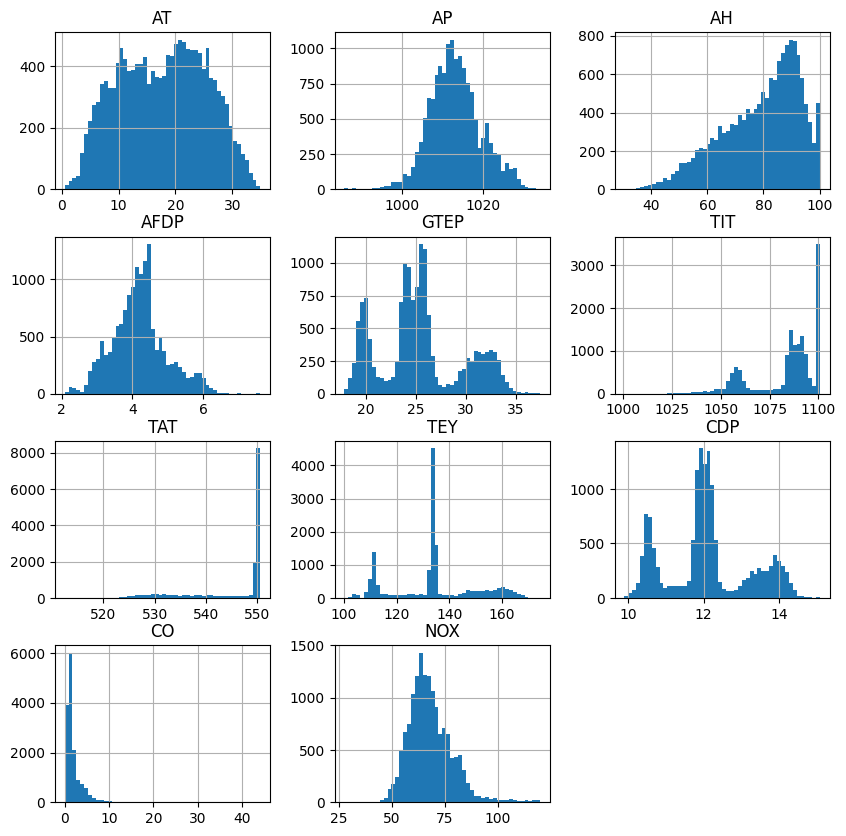

In [159]:
# create histogram for each variabel to check normality.
df.hist(bins = 50, figsize= (10, 10) )
plt.show()

most of the data is not normally dristributed

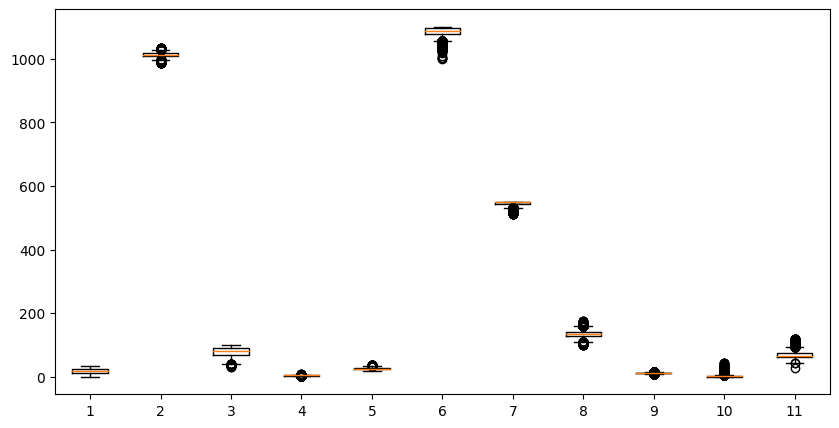

In [160]:
plt.figure(figsize = (10, 5))
plt.boxplot(df)
plt.show()

<Axes: >

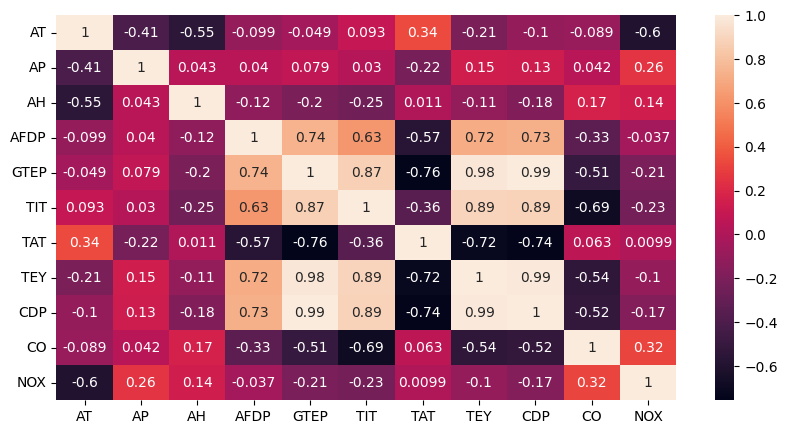

In [161]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot=True)


Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [162]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [163]:
gast = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'], axis=1 )
gast.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [164]:
#Scaling-(normalize)

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
gast.iloc[:,:] = mn.fit_transform(gast.iloc[:,:])

gast.head()


,AT,AP,AH,TEY
0,0.184182,0.456050,0.951314,0.195191
1,0.182020,0.466391,0.955881,0.195459
2,0.185295,0.474664,0.939003,0.195325
3,0.189922,0.482937,0.929126,0.195459
4,0.199830,0.493278,0.927708,0.195459


In [165]:
gast.corr()

,AT,AP,AH,TEY
AT,1.000000,-0.412953,-0.549432,-0.207495
AP,-0.412953,1.000000,0.042573,0.146939
AH,-0.549432,0.042573,1.000000,-0.110272
TEY,-0.207495,0.146939,-0.110272,1.000000


In [166]:
x= gast.iloc[:,:-1]
y= gast.iloc[:,-1]

In [167]:
x.shape

(15039, 3)

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((10527, 3), (4512, 3), (10527,), (4512,))

inpute dimention = 10

In [169]:
# create model
model = Sequential()
model.add(Dense(20, input_dim=3,  activation='relu')) #1st layer
model.add(Dense(15,  activation='relu')) #2nd layer
model.add(Dense(10,  activation='relu')) #3nd layer
model.add(Dense(5, activation='softmax')) #output layer

In [170]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [171]:
# Fit the model
h = model.fit(X_train, Y_train, validation_split=0.2, epochs=30, batch_size=30)
# evaluate the model on train data
scores = model.evaluate(X_train, Y_train)
print(model.metrics_names[1], scores[1]*100)

Epoch 1/30
281/281 [==============================] - 3s 6ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 2/30
281/281 [==============================] - 1s 4ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 3/30
281/281 [==============================] - 1s 4ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 4/30
281/281 [==============================] - 1s 3ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 5/30
281/281 [==============================] - 1s 3ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 6/30
281/281 [==============================] - 1s 3ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.1108 - val_mean_squared_error: 0.1108
Epoch 7/30
281/281 [========

In [172]:
h.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

If this value is consistently zero, it means your model is not learning anything from the training data. This could be due to several reasons, including improper model configuration, incorrect data preprocessing, or inappropriate choice of loss function (so here we take  metrics=['mean_squared_error'] insted of Accuracy)

# PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [173]:
forest = pd.read_csv('/content/forestfires.csv')
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [174]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [175]:
forest.size_category.unique()

array(['small', 'large'], dtype=object)

In [176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

forest.size_category = le.fit_transform(forest.size_category)


In [177]:
forest.drop(['month','day'], axis=1, inplace=True)
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [178]:
forest.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [179]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
forest.iloc[:,0:8] = mn.fit_transform(forest.iloc[:,0:8])

In [180]:
forest.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [181]:
x1 = forest.iloc[:,:-1]
y1= forest.iloc[:,-1]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, test_size = 0.2, random_state = 5)

xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((413, 28), (104, 28), (413,), (104,))

In [182]:
# create model
model1 = Sequential()
model1.add(Dense(20, input_dim=28,  activation='relu')) #1st layer
model1.add(Dense(10,  activation='relu')) #2nd layer
model1.add(Dense(5,  activation='relu')) #3nd layer
model1.add(Dense(1, activation='sigmoid')) #output layer

In [183]:
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
# Fit the model
h1 = model1.fit(xtrain, ytrain, validation_split=0.5, epochs=32, batch_size=32)
# evaluate the model on train data
scores = model1.evaluate(xtrain, ytrain)
print(model1.metrics_names[1], scores[1]*100)

Epoch 1/32
7/7 [==============================] - 1s 42ms/step - loss: 1.9314 - accuracy: 0.7864 - val_loss: 1.8259 - val_accuracy: 0.6522
Epoch 2/32
7/7 [==============================] - 0s 11ms/step - loss: 1.7595 - accuracy: 0.7864 - val_loss: 1.6052 - val_accuracy: 0.6522
Epoch 3/32
7/7 [==============================] - 0s 10ms/step - loss: 1.5301 - accuracy: 0.7864 - val_loss: 1.3966 - val_accuracy: 0.6522
Epoch 4/32
7/7 [==============================] - 0s 11ms/step - loss: 1.3284 - accuracy: 0.7864 - val_loss: 1.1424 - val_accuracy: 0.6522
Epoch 5/32
7/7 [==============================] - 0s 11ms/step - loss: 1.0547 - accuracy: 0.7864 - val_loss: 0.8937 - val_accuracy: 0.6522
Epoch 6/32
7/7 [==============================] - 0s 10ms/step - loss: 0.7654 - accuracy: 0.7864 - val_loss: 0.6770 - val_accuracy: 0.6522
Epoch 7/32
7/7 [==============================] - 0s 10ms/step - loss: 0.5510 - accuracy: 0.7864 - val_loss: 0.5652 - val_accuracy: 0.6522
Epoch 8/32
7/7 [===========

In [185]:
h1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

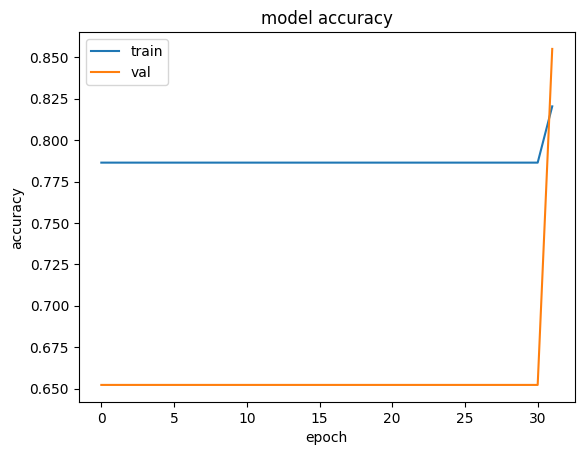

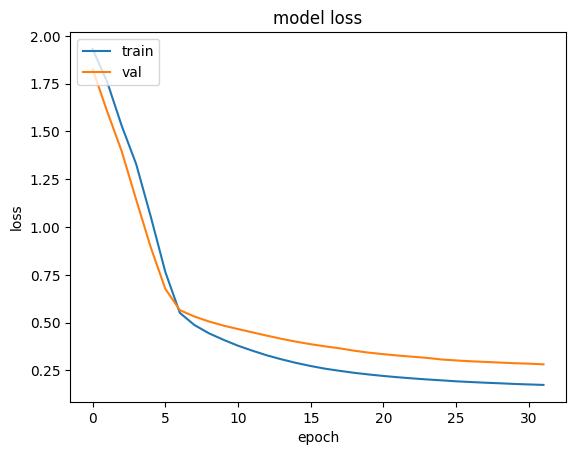

In [186]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [187]:
# evaluate the model on test data
scores =model1.evaluate(xtest, ytest)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.9038
mean_squared_error: 90.38%
